In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
model = Sequential()

model.add(Conv2D(32, kernel_size=3, activation='relu', input_shape=(224,224,3)))
model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Conv2D(128, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [3]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [4]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_datagen = image.ImageDataGenerator(rescale = 1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    'train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    'test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 193 images belonging to 2 classes.
Found 65 images belonging to 2 classes.


In [6]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 8,
    epochs = 50,
    validation_data = validation_generator,
    validation_steps = 2,
)

Epoch 1/50
8/8 [==============================] - 44s 6s/step - loss: 1.7764 - accuracy: 0.4978 - val_loss: 0.6908 - val_accuracy: 0.5781
Epoch 2/50
8/8 [==============================] - 36s 4s/step - loss: 0.6860 - accuracy: 0.5600 - val_loss: 0.6922 - val_accuracy: 0.5758
Epoch 3/50
8/8 [==============================] - 27s 3s/step - loss: 0.7030 - accuracy: 0.5600 - val_loss: 0.6846 - val_accuracy: 0.3939
Epoch 4/50
8/8 [==============================] - 34s 4s/step - loss: 0.6982 - accuracy: 0.5022 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 28s 3s/step - loss: 0.6929 - accuracy: 0.5928 - val_loss: 0.6941 - val_accuracy: 0.4848
Epoch 6/50
8/8 [==============================] - 24s 3s/step - loss: 0.6890 - accuracy: 0.5289 - val_loss: 0.7116 - val_accurac

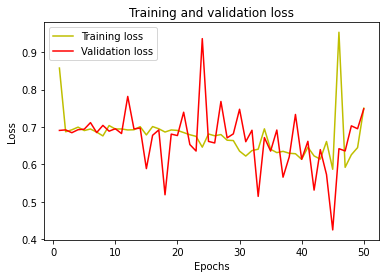

In [7]:
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

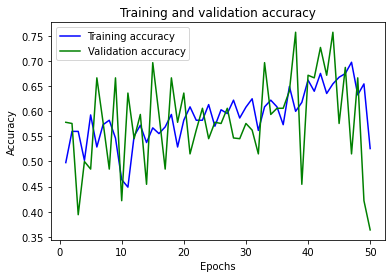

In [8]:
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)
plt.plot(epochs, train_acc, 'blue', label='Training accuracy')
plt.plot(epochs, val_acc, 'green', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()